In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('./src')

from vendor.Model import Model # Classe custom Modelo Deep
from digits import digits_data # Pegar todos os dados dos digitos MNIST
from PIL import Image			 # Manipulação de Pixels


### Importando o Modelo da minha pasta de modelos treinados. 
#### Esse modelo vem um classe custom da class *Model*, o qual é utilizado apenas numpy na sua implementação
#### Tendo sideo treinado para reconhecer o digits do data set MNIST, com seguintes configurações:
#### - **2** hidden layers de **128** dimensões
#### - **0.035** learning rate
#### - **sigmoid** activation, em todas as camadas 
#### - **MSE** função custo
#### - **120** épocas, cada epoca passa por **40 mil** exemplos dos dados de treinamento

## Comentários sobre treinamento:
	Houve experimentos anteriores, utilizando, duas (ou mais, porém esses demorariam muito na minha máquina) hidden layers de 64 dimensões, outra vez com 16 dimensões, e por fim 48.
Á priori, percebi com sigmoid 64 para 128 dimensões sempre achava um caminho que aprendia rápido o suficiente, com 50 épocas com lr = 0.035 
rapidamente chegava a 92% acurácia, e com mais algumas épocas chegava a 97% (*com dados de treinamento*). 

Porém eu temo que com tantas dimensões pode ocorrer de se especializar demais, eu penso nisso, porque mais lá pra baixo nesse notebook, existe uma sessão onde podemos assistir o que o modelo advinha com um exemplo *custom* de uma imagem 28x28 de um digito criada por mim no app **microsoft paint**, e nesse casos, com 128 dimensões, ele erra coisas que um modelo de 16 dimensões, não erraria, apesar do modelo de 16 ter uma acurácia menor (91%), me pareceu generalizar melhor. 
Eu imagino que com menos dimensões na camada escondida o Modelo é forçado a entender o que é mais importante, ao invez de "manter em mente" caracteristicas especificas dos dados de treinamento.

Além disso, os modelos com mais camadas de pequenas dimensões, demoraram  muito para aumentar acurácia, exemplo:
Modelo de:
	- 3 hidden layer de dimensões na sequencia (20,16,20)
	- **tangente hiperbolica**("tanh") activation, em todas as camadas
	- lr = 0.02
	- MSE, custo
	- 500 épocas de 40 mil exemplos
Esse modelo chegou a uma acurácia de 88%, muito inferior tanto em velocidade de treinamento, e acertos.
Mas, esse modelo de tanh, ele teve uma generalização decente, chegando a ser parecido com o Modelo que vamos usar (2 hidden de 128 dim).
Claro que foi só eu desenhando no paint e testando, mas te faz questionar um pouco se esse modelo continuasse treinando, ele teria uma generalização melhor?

In [63]:
# Modelo já Treinado, mencionado anteriormente
model = Model.load("./models/best/Model v128")

# traning_data, foi os 40 mil testados pelo modelo.
# dimensions, as dimensões usadas para treinamentodo modelo (784,128,128,10)
traning_data, _, all_data, dimensions = digits_data()

# Restante dos 30 mil exemplos que o modelo não viu, será nossos dados de teste
test_data_being_used = {
	"inputs":all_data["inputs"][40000:],
	"outputs":all_data["outputs"][40000:]
}

### Função usada para fazer predições do set MNIST com o Modelo. 
*Ao usar **test_prediction** ira mostrar a **imagem**, o **label** correto, e a **decisão** do modelo*

In [64]:
def test_prediction(index, data, model:Model):
	current_image = data["inputs"][index]
	y_predict = model.predict(current_image)[0]
	prediction = (y_predict == y_predict.max()).astype(int)

	guess = list(prediction).index(1)
	
	label = data["outputs"][index]
	ground_truth = list(label).index(1)

	# Opção de desobrigar de fornecer label correto, para quando formor utilizar paint
	if len(label) < 10:
		label = "made on paint"
		ground_truth = " paint"

	print("Label: ", label)
	print("Prediction: ", prediction)

	plt.gray()
	plt.title("Model thinks it is: " + str(guess) + "\nGround truth: " + str(ground_truth))
	plt.imshow( current_image.reshape((28, 28)) * 255, interpolation='nearest')
	plt.xticks([])
	plt.yticks([0])
	plt.show()

## Função p/ testar a acurácia dos restante 30 mil digitos que o modelo não viu ainda
### e ainda retorna todos os indices errados

In [65]:
def get_acurracy(testing_data):
	
	predicts = list()
	for y in testing_data["inputs"]:
		y_predict = model.predict(y)[0]
		prediction = (y_predict == y_predict.max()).astype(int)
		predicts.append(prediction)
	return model.accuracy(predictions=predicts, outputs=testing_data["outputs"], verbose=0)


## Array de indices onde o modelo errou
#### Acurácia: **99.1%** usando 30 mil exemplos dos dados de teste os quais o modelo nunca viu

In [66]:
accuracy,wrong_indexes = get_acurracy(test_data_being_used)

print( "Qntd de exemplos:",len(test_data_being_used["inputs"]))
print(f"Indexes onde está errado: {wrong_indexes}\n")
print("Acurácia: ",accuracy,'\n' )

Qntd de exemplos: 20000
Indexes onde está errado: [91, 120, 246, 317, 322, 342, 355, 391, 414, 426, 514, 522, 632, 747, 841, 930, 1054, 1253, 1280, 1464, 1544, 1600, 1686, 1698, 1764, 1794, 2117, 2129, 2160, 2163, 2218, 2324, 2800, 2899, 2932, 2953, 2968, 3216, 3312, 3476, 3507, 3547, 3556, 3910, 4011, 4032, 4191, 4377, 4506, 4586, 4756, 4778, 4834, 4896, 4916, 4954, 5194, 5218, 5278, 5340, 5368, 5426, 5438, 5505, 5739, 5792, 5814, 6014, 6213, 6397, 6464, 6480, 6590, 6662, 6664, 6800, 6842, 6890, 6914, 7082, 7302, 7624, 7628, 7662, 7663, 7726, 7728, 7882, 8258, 8648, 8653, 8812, 9202, 9286, 9653, 9681, 9701, 9718, 9719, 9720, 9726, 9731, 9735, 9747, 9915, 10008, 10247, 10381, 10447, 10495, 10613, 10659, 10674, 10684, 11014, 11044, 11112, 11182, 11192, 11247, 11328, 11500, 11522, 11681, 11813, 11940, 11941, 12016, 12109, 12118, 12135, 12148, 12293, 12369, 12371, 12447, 12534, 12597, 12607, 12610, 12654, 12721, 12771, 12921, 12939, 13206, 13225, 13422, 13475, 13503, 13549, 13558, 13597, 

### Escolha um index no intervalo [0,30'000) Cerca de 99% vai estar certo
#### *A ideia é poder ver a imagem e a predição do modelo*

Label:  [0 0 0 0 0 0 0 0 1 0]
Prediction:  [0 0 0 0 0 0 0 0 1 0]


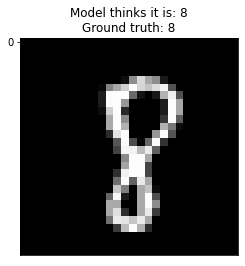

In [67]:
# Escolha um index no intervalo [0,10'000) Cerca de 96% vai estar certo
# Alguns dificeis são : 4601, 8
index = 8
test_prediction(index,test_data_being_used,model)

## Algumas das imagens que deram errado
#### *Apenas troque esses index e vejao exemplos em que o modelo errou*

Label:  [0 0 0 0 0 0 0 1 0 0]
Prediction:  [0 0 0 0 0 0 0 1 0 0]


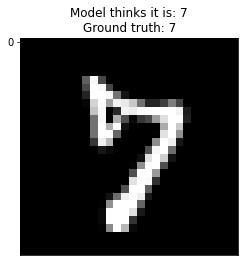

In [68]:
# Alguns dos indexes errados:9015,8,4497,80 (usando 10k testing_data)
index_errado = 4497
test_prediction(index_errado,test_data_being_used,model)

# Testaremos com novos dados gerando por desenhos no paint
### Essa função ajuda a pegar os pixels como np.array

In [69]:
def get_pixels(filename):
	im = Image.open(filename, "r")
	pixels = list(im.getdata())
	mono_channel_pixels = [rgb[2] for rgb in pixels[0:784]]
	return np.array(mono_channel_pixels)/255.0

## Agora **edite** o aquivo *digit28x28.png* no **paint** e **rode** a celula abaixo novamente para ir atualizando a predição do modelo

Label:  made on paint
Prediction:  [0 0 0 0 1 0 0 0 0 0]


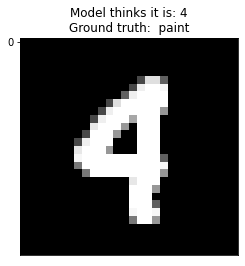

In [70]:
test_pixels = get_pixels("digit28x28.png")
test_prediction(0,{"inputs":[test_pixels],"outputs":[[1]]},model)
